# 8.1 Simple Experiments: One-Way ANOVA

## The Problem with Multiple t-Tests

### Scenario

You want to compare 4 different fertilizers. Why not just do all pairwise t-tests?

### The Multiple Testing Problem

With k = 4 groups:
- Number of pairwise comparisons = C(4,2) = 6
- If each test has α = 0.05, probability of **at least one** Type I error:

$$
P(\text{at least one false positive}) = 1 - (1-0.05)^6 \approx 0.26
$$

That's a 26% chance of a false discovery!

### The Solution: ANOVA

**Analysis of Variance (ANOVA)** tests all groups simultaneously with a **single** test at significance level α.

## One-Way ANOVA Model

### Setup

We have:
- **k groups** (treatments, conditions, etc.)
- **nᵢ observations** in group i
- **Total N** observations: \(N = \sum_{i=1}^{k} n_i\)

### The Model

For observation j in group i:

$$
y_{ij} = \mu_i + \epsilon_{ij}
$$

where:
- \(\mu_i\) is the mean of group i
- \(\epsilon_{ij} \sim N(0, \sigma^2)\) is random error

### Hypotheses

- **H₀**: \(\mu_1 = \mu_2 = \cdots = \mu_k\) (all group means are equal)
- **H₁**: At least one \(\mu_i\) is different

## The Core Idea: Partitioning Variance

### Total Variation

How much do observations vary overall?

$$
\text{SST (Total Sum of Squares)} = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (y_{ij} - \bar{y})^2
$$

where \(\bar{y}\) is the grand mean of all observations.

### Between-Group Variation

How much do **group means** differ from the grand mean?

$$
\text{SSB (Between Sum of Squares)} = \sum_{i=1}^{k} n_i(\bar{y}_i - \bar{y})^2
$$

### Within-Group Variation

How much do observations vary **within** each group?

$$
\text{SSW (Within Sum of Squares)} = \sum_{i=1}^{k}\sum_{j=1}^{n_i} (y_{ij} - \bar{y}_i)^2
$$

### The Key Relationship

$$
\text{SST} = \text{SSB} + \text{SSW}
$$

Total variation = Variation between groups + Variation within groups

## The F-Statistic

### Mean Squares

Convert sums of squares to **mean squares** (variances) by dividing by degrees of freedom:

$$
\text{MSB} = \frac{\text{SSB}}{k-1} \quad \text{(between-group variance)}
$$

$$
\text{MSW} = \frac{\text{SSW}}{N-k} \quad \text{(within-group variance)}
$$

### The Test Statistic

$$
F = \frac{\text{MSB}}{\text{MSW}}
$$

### Logic

- If H₀ is true (all means equal), MSB and MSW both estimate σ², so F ≈ 1
- If H₁ is true (means differ), MSB > MSW, so F > 1
- Under H₀: \(F \sim F_{k-1, N-k}\) (F-distribution)

### Decision

- Compute F-statistic
- Find p-value from F-distribution
- Reject H₀ if p-value < α

## Python Example: Fertilizer Experiment

One-Way ANOVA: Fertilizer Comparison
Fertilizer A: mean = 21.38, std = 1.69
Fertilizer B: mean = 26.00, std = 1.31
Fertilizer C: mean = 19.38, std = 1.06
Fertilizer D: mean = 24.38, std = 1.06

H₀: μ_A = μ_B = μ_C = μ_D
H₁: At least one mean is different

F-statistic: 41.516
P-value: 0.000000

Decision: Reject H₀ (p = 0.0000 < 0.05)
Conclusion: At least one fertilizer has a different effect.

Manual ANOVA Calculation
Grand mean: 22.781
Number of groups (k): 4
Total observations (N): 32

SST (Total Sum of Squares): 259.469
SSB (Between Sum of Squares): 211.844
SSW (Within Sum of Squares): 47.625
Verification: SSB + SSW = 259.469 = SST

df (between): 3
df (within): 28
df (total): 31

MSB (Mean Square Between): 70.615
MSW (Mean Square Within): 1.701

F-statistic: 41.516
P-value: 0.000000

ANOVA Table
Source                    SS     df           MS          F    p-value
----------------------------------------------------------------------
Between Groups       211.844      3       70.615 

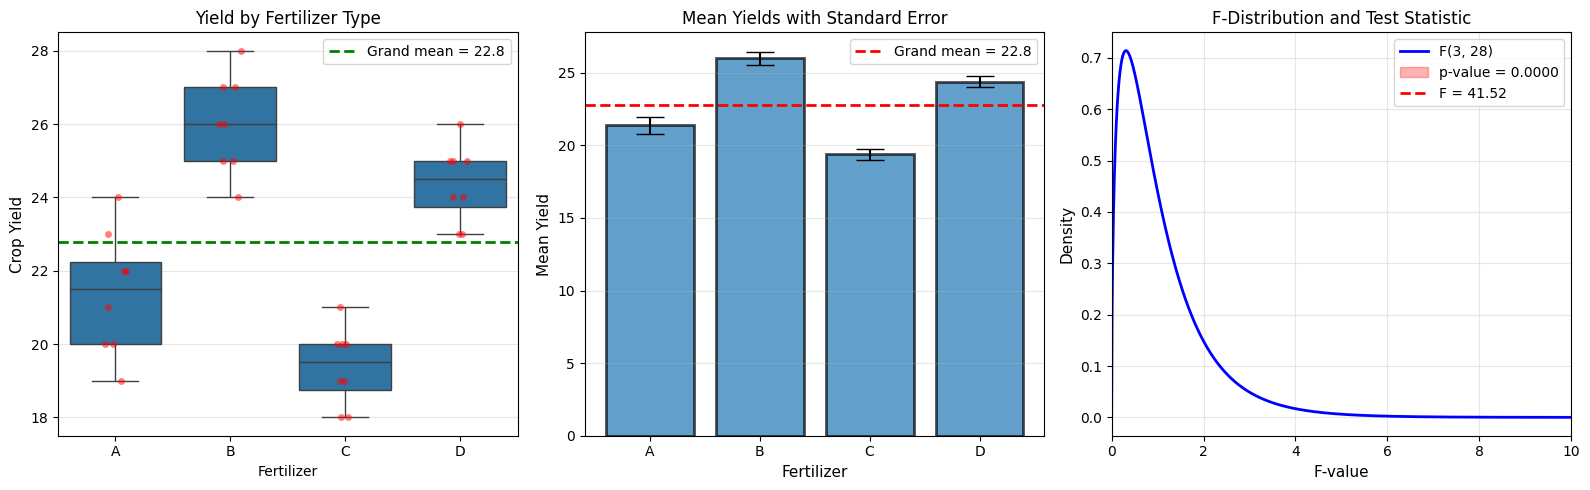

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Simulate fertilizer experiment
fertilizer_A = np.array([20, 22, 19, 24, 21, 23, 20, 22])
fertilizer_B = np.array([25, 27, 26, 28, 24, 26, 27, 25])
fertilizer_C = np.array([18, 20, 19, 21, 18, 20, 19, 20])
fertilizer_D = np.array([23, 25, 24, 26, 23, 25, 24, 25])

print("One-Way ANOVA: Fertilizer Comparison")
print("="*70)
print(f"Fertilizer A: mean = {np.mean(fertilizer_A):.2f}, std = {np.std(fertilizer_A, ddof=1):.2f}")
print(f"Fertilizer B: mean = {np.mean(fertilizer_B):.2f}, std = {np.std(fertilizer_B, ddof=1):.2f}")
print(f"Fertilizer C: mean = {np.mean(fertilizer_C):.2f}, std = {np.std(fertilizer_C, ddof=1):.2f}")
print(f"Fertilizer D: mean = {np.mean(fertilizer_D):.2f}, std = {np.std(fertilizer_D, ddof=1):.2f}")
print()

# Combine data
all_data = np.concatenate([fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D])
groups = ['A']*len(fertilizer_A) + ['B']*len(fertilizer_B) + \
         ['C']*len(fertilizer_C) + ['D']*len(fertilizer_D)

# Perform one-way ANOVA using scipy
f_stat, p_value = stats.f_oneway(fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D)

print(f"H₀: μ_A = μ_B = μ_C = μ_D")
print(f"H₁: At least one mean is different")
print()
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.6f}")
print()

if p_value < 0.05:
    print(f"Decision: Reject H₀ (p = {p_value:.4f} < 0.05)")
    print("Conclusion: At least one fertilizer has a different effect.")
else:
    print(f"Decision: Fail to reject H₀ (p = {p_value:.4f} ≥ 0.05)")
    print("Conclusion: No significant difference among fertilizers.")

# Manual ANOVA calculation for understanding
print("\n" + "="*70)
print("Manual ANOVA Calculation")
print("="*70)

# Grand mean
grand_mean = np.mean(all_data)
print(f"Grand mean: {grand_mean:.3f}")

# Group means
means = [np.mean(fertilizer_A), np.mean(fertilizer_B), 
         np.mean(fertilizer_C), np.mean(fertilizer_D)]
n_groups = 4
n_per_group = len(fertilizer_A)
N = n_groups * n_per_group

print(f"Number of groups (k): {n_groups}")
print(f"Total observations (N): {N}")
print()

# SST (Total Sum of Squares)
SST = np.sum((all_data - grand_mean)**2)
print(f"SST (Total Sum of Squares): {SST:.3f}")

# SSB (Between Sum of Squares)
SSB = sum([n_per_group * (m - grand_mean)**2 for m in means])
print(f"SSB (Between Sum of Squares): {SSB:.3f}")

# SSW (Within Sum of Squares)
SSW = SST - SSB
print(f"SSW (Within Sum of Squares): {SSW:.3f}")
print(f"Verification: SSB + SSW = {SSB + SSW:.3f} = SST")
print()

# Degrees of freedom
df_between = n_groups - 1
df_within = N - n_groups
df_total = N - 1

print(f"df (between): {df_between}")
print(f"df (within): {df_within}")
print(f"df (total): {df_total}")
print()

# Mean Squares
MSB = SSB / df_between
MSW = SSW / df_within

print(f"MSB (Mean Square Between): {MSB:.3f}")
print(f"MSW (Mean Square Within): {MSW:.3f}")
print()

# F-statistic
F_manual = MSB / MSW
print(f"F-statistic: {F_manual:.3f}")

# P-value
p_manual = 1 - stats.f.cdf(F_manual, df_between, df_within)
print(f"P-value: {p_manual:.6f}")

# ANOVA Table
print("\n" + "="*70)
print("ANOVA Table")
print("="*70)
print(f"{'Source':<15} {'SS':>12} {'df':>6} {'MS':>12} {'F':>10} {'p-value':>10}")
print("-"*70)
print(f"{'Between Groups':<15} {SSB:12.3f} {df_between:6d} {MSB:12.3f} {F_manual:10.3f} {p_manual:10.6f}")
print(f"{'Within Groups':<15} {SSW:12.3f} {df_within:6d} {MSW:12.3f}")
print(f"{'Total':<15} {SST:12.3f} {df_total:6d}")

# Visualization
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

# Box plot
data_df = pd.DataFrame({
    'Yield': all_data,
    'Fertilizer': groups
})
sns.boxplot(data=data_df, x='Fertilizer', y='Yield', ax=ax1)
sns.stripplot(data=data_df, x='Fertilizer', y='Yield', 
              color='red', alpha=0.5, ax=ax1)
ax1.axhline(grand_mean, color='green', linestyle='--', 
            linewidth=2, label=f'Grand mean = {grand_mean:.1f}')
ax1.set_ylabel('Crop Yield', fontsize=11)
ax1.set_title('Yield by Fertilizer Type', fontsize=12)
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# Means plot with error bars
group_names = ['A', 'B', 'C', 'D']
group_means = [np.mean(g) for g in [fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D]]
group_sems = [stats.sem(g) for g in [fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D]]

ax2.bar(group_names, group_means, yerr=group_sems, capsize=10, 
        alpha=0.7, edgecolor='black', linewidth=2)
ax2.axhline(grand_mean, color='red', linestyle='--', linewidth=2,
            label=f'Grand mean = {grand_mean:.1f}')
ax2.set_ylabel('Mean Yield', fontsize=11)
ax2.set_xlabel('Fertilizer', fontsize=11)
ax2.set_title('Mean Yields with Standard Error', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# F-distribution
x = np.linspace(0, 10, 1000)
y = stats.f.pdf(x, df_between, df_within)

ax3.plot(x, y, 'b-', linewidth=2, label=f'F({df_between}, {df_within})')
ax3.fill_between(x[x >= F_manual], 0, stats.f.pdf(x[x >= F_manual], df_between, df_within),
                  alpha=0.3, color='red', label=f'p-value = {p_value:.4f}')
ax3.axvline(F_manual, color='red', linestyle='--', linewidth=2,
            label=f'F = {F_manual:.2f}')
ax3.set_xlabel('F-value', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('F-Distribution and Test Statistic', fontsize=12)
ax3.legend()
ax3.grid(alpha=0.3)
ax3.set_xlim(0, 10)

plt.tight_layout()
plt.savefig('one_way_anova.png', dpi=150, bbox_inches='tight')
plt.show()

## Post-Hoc Tests: Which Groups Differ?

### The Problem

ANOVA tells us "at least one group is different" but not **which** groups differ.

### Solution: Post-Hoc Tests

Only perform after rejecting H₀ in ANOVA.

### Tukey's HSD (Honestly Significant Difference)

Most common post-hoc test. Controls family-wise error rate.

In [2]:
from scipy.stats import tukey_hsd
import itertools

def tukey_hsd_test(data_groups, group_names, alpha=0.05):
    """
    Perform Tukey's HSD post-hoc test.
    """
    # Perform Tukey HSD
    res = tukey_hsd(*data_groups)
    
    print("Tukey's HSD Post-Hoc Test")
    print("="*70)
    print(f"{'Comparison':<20} {'Mean Diff':>12} {'Lower CI':>12} {'Upper CI':>12} {'Reject H₀':>12}")
    print("-"*70)
    
    # Pairwise comparisons
    idx = 0
    for i in range(len(group_names)):
        for j in range(i+1, len(group_names)):
            mean_diff = np.mean(data_groups[i]) - np.mean(data_groups[j])
            ci_lower = res.confidence_interval(confidence_level=1-alpha).low[i, j]
            ci_upper = res.confidence_interval(confidence_level=1-alpha).high[i, j]
            reject = "Yes" if res.pvalue[i, j] < alpha else "No"
            
            comparison = f"{group_names[i]} vs {group_names[j]}"
            print(f"{comparison:<20} {mean_diff:12.3f} {ci_lower:12.3f} {ci_upper:12.3f} {reject:>12}")
    
    return res

# Apply to our data
data_groups = [fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D]
group_names = ['A', 'B', 'C', 'D']

tukey_result = tukey_hsd_test(data_groups, group_names)

Tukey's HSD Post-Hoc Test
Comparison              Mean Diff     Lower CI     Upper CI    Reject H₀
----------------------------------------------------------------------
A vs B                     -4.625       -6.405       -2.845          Yes
A vs C                      2.000        0.220        3.780          Yes
A vs D                     -3.000       -4.780       -1.220          Yes
B vs C                      6.625        4.845        8.405          Yes
B vs D                      1.625       -0.155        3.405           No
C vs D                     -5.000       -6.780       -3.220          Yes


## ANOVA Assumptions

### Three Key Assumptions

1. **Independence**: Observations are independent
2. **Normality**: Data in each group is approximately normally distributed
3. **Homogeneity of Variance**: All groups have equal variances

### Checking Normality

Normality Tests (Shapiro-Wilk)
Group              Statistic      p-value      Normal?
------------------------------------------------------------
A                     0.9657       0.8619          Yes
B                     0.9651       0.8568          Yes
C                     0.9116       0.3657          Yes
D                     0.9116       0.3657          Yes


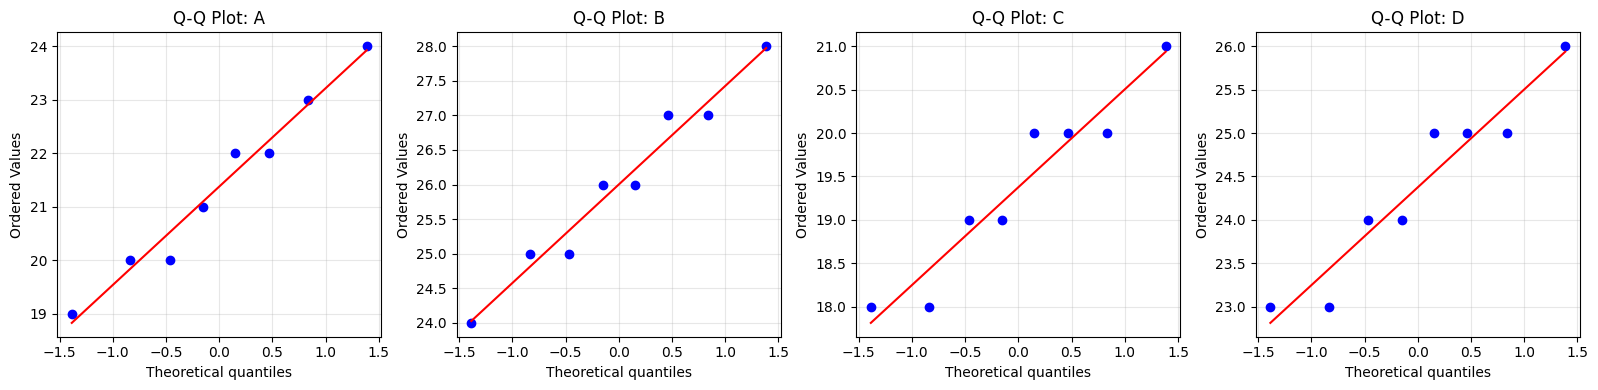

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

def check_normality(data_groups, group_names):
    """
    Check normality assumption using Shapiro-Wilk test.
    """
    print("Normality Tests (Shapiro-Wilk)")
    print("="*60)
    print(f"{'Group':<15} {'Statistic':>12} {'p-value':>12} {'Normal?':>12}")
    print("-"*60)
    
    for data, name in zip(data_groups, group_names):
        stat, p = stats.shapiro(data)
        normal = "Yes" if p > 0.05 else "No"
        print(f"{name:<15} {stat:12.4f} {p:12.4f} {normal:>12}")
    
    # Q-Q plots
    fig, axes = plt.subplots(1, len(data_groups), figsize=(4*len(data_groups), 4))
    if len(data_groups) == 1:
        axes = [axes]
    
    for ax, data, name in zip(axes, data_groups, group_names):
        stats.probplot(data, dist="norm", plot=ax)
        ax.set_title(f'Q-Q Plot: {name}')
        ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('normality_check.png', dpi=150, bbox_inches='tight')
    plt.show()

check_normality([fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D],
                ['A', 'B', 'C', 'D'])

### Checking Homogeneity of Variance

**Levene's Test**:

In [4]:
def check_homogeneity(data_groups, group_names):
    """
    Check homogeneity of variance using Levene's test.
    """
    stat, p = stats.levene(*data_groups)
    
    print("\nHomogeneity of Variance (Levene's Test)")
    print("="*60)
    print(f"Test statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    
    if p > 0.05:
        print("Conclusion: Equal variances (p > 0.05)")
    else:
        print("Conclusion: Unequal variances (p < 0.05)")
        print("Consider: Welch's ANOVA or transformation")

check_homogeneity([fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D],
                  ['A', 'B', 'C', 'D'])


Homogeneity of Variance (Levene's Test)
Test statistic: 0.9934
P-value: 0.4103
Conclusion: Equal variances (p > 0.05)


## Effect Size: Eta-Squared (η²)

### Definition

Proportion of total variance explained by group membership:

$$
\eta^2 = \frac{\text{SSB}}{\text{SST}}
$$

### Interpretation

| η² | Effect Size |
|------|-------------|
| 0.01 | Small |
| 0.06 | Medium |
| 0.14 | Large |

In [5]:
def eta_squared(SSB, SST):
    """Calculate eta-squared effect size."""
    return SSB / SST

eta_sq = eta_squared(SSB, SST)
print(f"\nEffect Size (η²): {eta_sq:.3f}")
print(f"Interpretation: {eta_sq*100:.1f}% of variance explained by fertilizer type")

if eta_sq < 0.01:
    effect = "negligible"
elif eta_sq < 0.06:
    effect = "small"
elif eta_sq < 0.14:
    effect = "medium"
else:
    effect = "large"
    
print(f"Effect size is: {effect}")


Effect Size (η²): 0.816
Interpretation: 81.6% of variance explained by fertilizer type
Effect size is: large


## When ANOVA Assumptions Fail

### Non-Normal Data

**Kruskal-Wallis Test** (non-parametric alternative):

In [6]:
from scipy import stats

# Non-parametric alternative to one-way ANOVA
H_stat, p_value_kw = stats.kruskal(fertilizer_A, fertilizer_B, 
                                    fertilizer_C, fertilizer_D)

print("Kruskal-Wallis Test (Non-Parametric ANOVA)")
print(f"H-statistic: {H_stat:.3f}")
print(f"P-value: {p_value_kw:.4f}")

Kruskal-Wallis Test (Non-Parametric ANOVA)
H-statistic: 25.041
P-value: 0.0000


### Unequal Variances

**Welch's ANOVA**:

In [7]:
# Welch's ANOVA (for unequal variances)
# Not directly in scipy, but can use statsmodels
try:
    from statsmodels.stats.oneway import anova_oneway
    result = anova_oneway([fertilizer_A, fertilizer_B, fertilizer_C, fertilizer_D],
                          use_var='unequal')
    print("\nWelch's ANOVA:")
    print(result)
except ImportError:
    print("Install statsmodels for Welch's ANOVA")


Welch's ANOVA:
statistic = 47.33762323070536
pvalue = 5.40808746946148e-08
df = (3.0, np.float64(15.366263596359875))
df_num = 3.0
df_denom = 15.366263596359875
nobs_t = 32.0
n_groups = 4
means = [21.375 26.    19.375 24.375]
nobs = [8. 8. 8. 8.]
vars_ = [2.83928571 1.71428571 1.125      1.125     ]
use_var = unequal
welch_correction = True
tuple = (np.float64(47.33762323070536), np.float64(5.40808746946148e-08))



## Summary

### When to Use One-Way ANOVA

✅ Comparing ≥ 3 groups  
✅ One categorical independent variable  
✅ Continuous dependent variable  
✅ Independent observations  
✅ Approximately normal data in each group  
✅ Equal variances across groups  

### Key Concepts

1. **ANOVA tests all groups simultaneously** (avoids multiple testing)
2. **F-statistic** = Between-group variance / Within-group variance
3. **Post-hoc tests** identify which specific groups differ
4. **Effect size (η²)** quantifies practical significance
5. **Assumptions matter** - check and use alternatives if violated

### ANOVA Table Template

| Source | SS | df | MS | F | p-value |
|--------|----|----|-------|---|------|
| Between | SSB | k-1 | MSB | F | p |
| Within | SSW | N-k | MSW | | |
| Total | SST | N-1 | | | |